# Что такое "цветовые пространства"? 

## RGB

Чаще всего используется пространство RGB = Red, Green, Blue. 

<p align="center">
    <img src="https://github.com/serykhelena/PYGuides/blob/main/notebooks/assets/rgb.png?raw=true" alt="drawing" width="300"/>
</p>

Цвета пространства представлены с точки зрения их красной, зелёной и синей компонент. 

Говоря, более техническим языком, RGB описывает цвет как набор из трёх компонент. Каждый компонент принимает значение между 0 и 255, где набор `(0, 0, 0)` соответствует чёрному цвету, а `(255, 255, 255)` соответсвует белому цвету. 

RGB считается "аддитивным" цветовым пространством, то есть каждый цвет получается при помощи добавления части других цветов (компонент). 

Ниже представлены парочка примеров цветов в пространстве RGB 

| Название цвета    | RGB значение  |
|:-----------------:|:-------------:|
| Красный           | 255, 0, 0     |
| Оранжевый         | 255, 128, 0   |
| Розовый           | 255, 153, 255 |

RGB - это одно из пяти основных цветовых пространств, каждое из которых обладает своими модификациями. Существует очееннньь много цветовых пространств, так как разные пространства могут быть использованы для различных задач. 

## CMYK (цьмок)

В области печатной продукции, цветовое пространство CMYK является более используемым и полезным, так как оно описывает цветовые комбинации необходимые для получения цвета на белом фоне (а бумага чаще всего всё же белая, а не чёрная). 

<p align="center">
    <img src="https://github.com/serykhelena/PYGuides/blob/main/notebooks/assets/cmyk.png?raw=true" alt="drawing" width="500"/>
</p>

Для RGB набор из нулей соотвествует чёрному цвету, а для CMYK - этот набор уже будет отражать белый цвет. 
Цветные принтеры содержат в себе ёмкости с чернилами голубого, пурпурного, жёлтого и чёрного цветов. 

## HSV и HSL 

HSV и HSL - это цветовые пространства, где используется описание оттенка, насыщенности и яркости, которые особенно полезны для определения контраста в изображениях. Эти цветовые пространства часто используются в инструментах выбора цвета в программном обеспечении и для веб-дизайна.

HSV представлен в виде цилинда и состоит из: 

* Hue (тон)
* Saturation (насыщенность)
* Value (яркость)

Цвета и оттенки моделируются как плоскость, которая вращается вокруг центральной вертикальной оси (которая соответствует каналу яркости). Значения яркости изменяется от тёмного (0 внизу оси) до светлого (сверху оси). Ось насыщенности определяет оттенки от наименее насыщенных до наиболее насыщенных. 

<p align="center">
    <img src="https://github.com/serykhelena/PYGuides/blob/main/notebooks/assets/hsv_hsl.jpg?raw=true" alt="drawing" width="500"/>
</p>


На самом деле цвет - это непрерывное явление, а это означает, что существует бесконечное количество цветов. Цветовые пространства, однако, представляют цвет через дискретные структуры (фиксированное количество целочисленных значений), что приемлемо, поскольку человеческий глаз и восприятие также ограничены. Цветовые пространства могут полностью отображать все цвета, которые мы можем различать.

## Давайте щупать пространства 

Давайте посмотрим какие цветовые пространства есть в OpenCV. 

> Список и количество флагов может варьироваться в зависимости от версии библиотеки OpenCV. 

In [1]:
import os 

import cv2 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

print(f"Доступно: {len(flags)} цветовых пространcтв!")

print(f"Пример пространства:\t{flags[48]}")

Доступно: 274 цветовых пространcтв!
Пример пространства:	COLOR_BGR2RGB


Первая аббревиатура после `COLOR_` соответствует исходному цветовому пространству (то есть то, в котором сейчас уже находится изображение), аббревиатура после цифры `2` соответствует целевому цветовому пространству (то есть то пространство, в которое хотим конвертировать). 

В нашем примере флаг обозначает преобразование из `BGR` (Blue-Green-Red) в `RGB` (Red-Green-Blue). Как вы могли заметить, эти пространства очень похожи между собой, разница лишь в порядке каналов. 

Давайте загрузим тестовую картинку. 

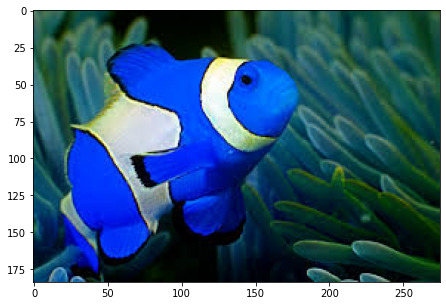

In [3]:
img_fpath = os.path.join(os.pardir, "assets", "nemo0.jpg")
original_image = cv2.imread(img_fpath)

plt.figure(figsize=[8, 5])
plt.imshow(original_image)
plt.show()

Как-то странно выглядит рыба клоун, не находите? 
Вот и проявилась разница между пространствами `BGR` и `RGB`. Красный и синий каналы поменялись местами. 

Но важно помнить, что в OpenCV по умолчанию изображения всегда читаются в **BGR-формате**.

Давайте воспользуемся функцией `cvtColor()`, чтобы вернуть рыбке её естественный цвет. 

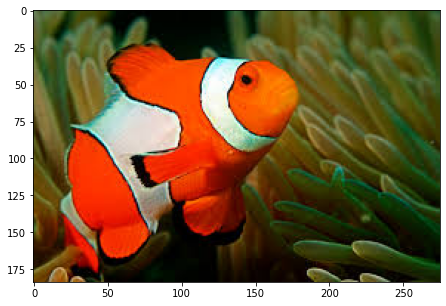

In [4]:
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=[8, 5])
plt.imshow(original_image)
plt.show()

Всё же так рыба-клоун выглядит гораздо лучше! 

`А в конце хочется отметить, что лучше всех цветовых пространств может быть только родное восьмибитное в оттенках серого. Поскольку поиск контуров там всё равно будет работать, а цвета в реальности очень сильно зависят от внешних факторов - попробуйте посмотреть через камеру на что-то, подсвеченное дешёвой отвратительной светодиодной лампочкой`